In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
x_train=pd.read_csv(r'C:\Users\dell\Downloads\Train.csv')
x=x_train[['feature_1','feature_2','feature_3','feature_4','feature_5']]
x
y=x_train['target']
y
x1=x_train['feature_1']
x2=x_train['feature_2']
x3=x_train['feature_3']
x4=x_train['feature_4']
x5=x_train['feature_5']
x

,feature_1,feature_2,feature_3,feature_4,feature_5
0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077
...,...,...,...,...,...
1595,-0.274961,-0.820634,-0.757173,-0.147555,-0.307149
1596,-0.076099,0.255257,0.290054,1.796036,0.340350
1597,1.044177,-0.899206,1.730399,-1.871057,0.442520
1598,-1.269173,-0.005052,1.857669,-1.080365,0.736334


## GRADIENT DESCENT ALGO

In [5]:
def hypothesis(x1,x2,x3,x4,x5,theta):
    return theta[0]+theta[1]*x1+theta[2]*x2+theta[3]*x3+theta[4]*x4+theta[5]*x5

In [6]:
def error(x1,x2,x3,x4,x5,y,theta):
    error=0
    for i in range(x1.shape[0]):
        hx=hypothesis(x1[i],x2[i],x3[i],x4[i],x5[i],theta)
        error+=(hx-y[i])**2
    return error

In [10]:
def gradient(x1,x2,x3,x4,x5,y,theta):
    grad=np.zeros((6,))
    for i in range(x1.shape[0]):
        hx=hypothesis(x1[i],x2[i],x3[i],x4[i],x5[i],theta)
        grad[0]+=(hx-y[i])
        grad[1]+=(hx-y[i])*x1[i]
        grad[2]+=(hx-y[i])*x2[i]
        grad[3]+=(hx-y[i])*x3[i]
        grad[4]+=(hx-y[i])*x4[i]
        grad[5]+=(hx-y[i])*x5[i]
        
    return grad
error_list=[]
theta_list=[]
def gradientdescent(x1,x2,x3,x4,x5,y,learning_rate=0.001):
    theta=np.zeros((6,1))
                   
    max_iteration=100
    i=0
    while(i<=max_iteration):
        grad=gradient(x1,x2,x3,x4,x5,y,theta)
        e=error(x1,x2,x3,x4,x5,y,theta)
        error_list.append(e)
        theta_list.append(theta)
        theta[0]-=learning_rate*grad[0]
        theta[1]-=learning_rate*grad[1]
        theta[2]-=learning_rate*grad[2]
        theta[3]-=learning_rate*grad[3]
        theta[4]-=learning_rate*grad[4]
        theta[5]-=learning_rate*grad[5]
        i+=1
    return (theta,error_list,theta_list)

In [11]:
final_theta,error_list,theta_list=gradientdescent(x1,x2,x3,x4,x5,y)

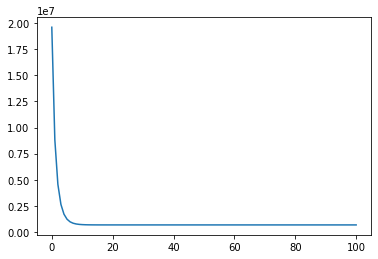

In [12]:
plt.plot(error_list)
plt.show()

In [23]:
test_set=pd.read_csv(r'C:\Users\dell\Downloads\Test.csv')
t1=test_set['feature_1'].values
t2=test_set['feature_2'].values
t3=test_set['feature_3'].values
t4=test_set['feature_4'].values
t5=test_set['feature_5'].values
targettv=hypothesis(t1,t2,t3,t4,t5,final_theta)
t=targettv.reshape(-1,1)
t

array([[ 1.14583689e+02],
       [ 1.18012815e+02],
       [-2.17398523e+01],
       [-4.39368985e+01],
       [-9.59148984e+01],
       [-4.45074240e+01],
       [-7.55665260e+01],
       [ 2.38208355e+01],
       [ 1.73835284e+02],
       [ 1.72849290e+02],
       [-1.05402312e+02],
       [-2.08020234e+01],
       [-3.91323777e+00],
       [ 1.22999186e+02],
       [ 4.03078842e+01],
       [ 4.57128495e+01],
       [-1.89628491e+02],
       [ 2.26125454e+01],
       [ 1.16410473e+01],
       [ 1.36342143e+02],
       [ 6.49162552e+01],
       [-6.19884884e+01],
       [-1.08194679e+02],
       [-7.41212747e+00],
       [-5.85239528e+01],
       [ 1.18889777e+01],
       [ 2.92376400e+01],
       [ 1.07687579e+02],
       [ 2.41468563e+01],
       [-2.61050120e+01],
       [ 1.10968076e+02],
       [-4.48797096e+01],
       [ 2.16799939e+02],
       [-1.38606052e+01],
       [-2.28603182e+02],
       [ 1.54896021e+02],
       [-2.22583390e+00],
       [ 1.27230344e+01],
       [-3.0

In [19]:
final_theta.reshape(-1,)

array([ 4.99096674, 29.68187118, 92.6624776 ,  8.28062089, 44.76773522,
        2.51916121])

Text(0.5, 1.0, 'air quality index')

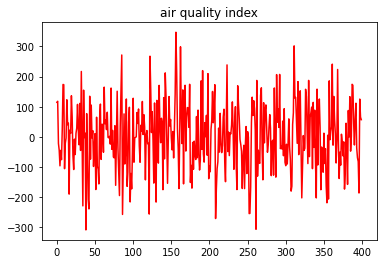

In [27]:
plt.plot(t,color='red')
plt.title('air quality index')